In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
## checking missing values
df.isna().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.shape

(1000, 8)

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
# checking the number of unique values for each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
# check statistics of the data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
# Exploring data


In [13]:
print("categories in 'gender' variable:  ",end=" ")
print(df["gender"].unique())

print("categories in 'race/ethnicity' variable:  ",end=" ")
print(df["race/ethnicity"].unique())

print("categories in 'parental level of education' variable:  ",end=" ")
print(df["parental level of education"].unique())

print("categories in 'lunch' variable:  ",end=" ")
print(df["lunch"].unique())

print("test preparation course' variable:  ",end=" ")
print(df["test preparation course"].unique())


categories in 'gender' variable:   ['female' 'male']
categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:   ['standard' 'free/reduced']
test preparation course' variable:   ['none' 'completed']


In [14]:
## define numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype !="O" ]
categorical_features = [feature for feature in df.columns if df[feature].dtype =="O" ]

## print columns
print("we have {} numerical features : {}".format(len(numerical_features),numerical_features))
print("\nwe have {} categorical_features : {}".format(len(categorical_features),categorical_features))

we have 3 numerical features : ['math score', 'reading score', 'writing score']

we have 5 categorical_features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [15]:
# adding columns for "total score" and "average"
df["total_score"] = df["math score"] + df["reading score"]+ df["writing score"]
df["average"]=df["total_score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full=df[df["reading score"]==100]["average"].count()
writing_full=df[df["writing score"]==100]["average"].count()
math_full=df[df["math score"]==100]["average"].count()

In [17]:
print(f"number of students with full marks in maths: {math_full}")
print(f"number of students with full marks in writing: {writing_full}")
print(f"number of students with full marks in reading score: {reading_full}")

number of students with full marks in maths: 7
number of students with full marks in writing: 14
number of students with full marks in reading score: 17


In [18]:
reading_less_20=df[df["reading score"]<=20]["average"].count()
writing_less_20=df[df["writing score"]<=20]["average"].count()
math_less_20=df[df["math score"]<=20]["average"].count()

print(f"number of students with less than 20 marks in maths: {math_less_20}")
print(f"number of students with  less than 20 marks in writing: {writing_less_20}")
print(f"number of students  less than 20 marks in reading score reading: {reading_less_20}")

number of students with less than 20 marks in maths: 4
number of students with  less than 20 marks in writing: 3
number of students  less than 20 marks in reading score reading: 1


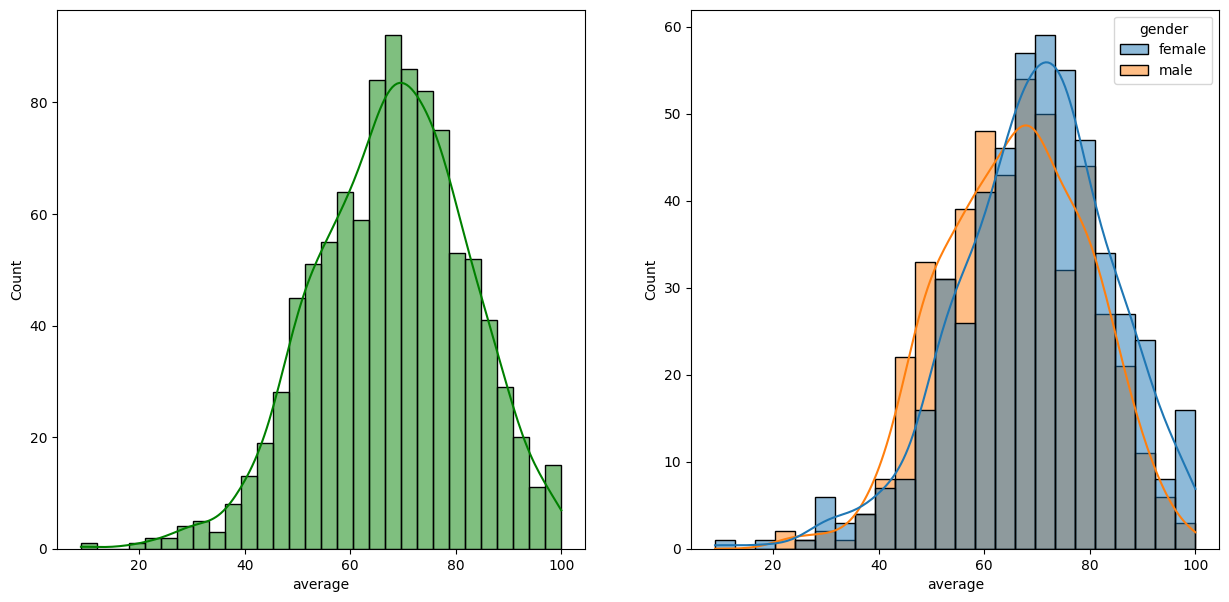

In [19]:
## data visulization
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="average",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="average",kde=True,hue="gender")
plt.show()

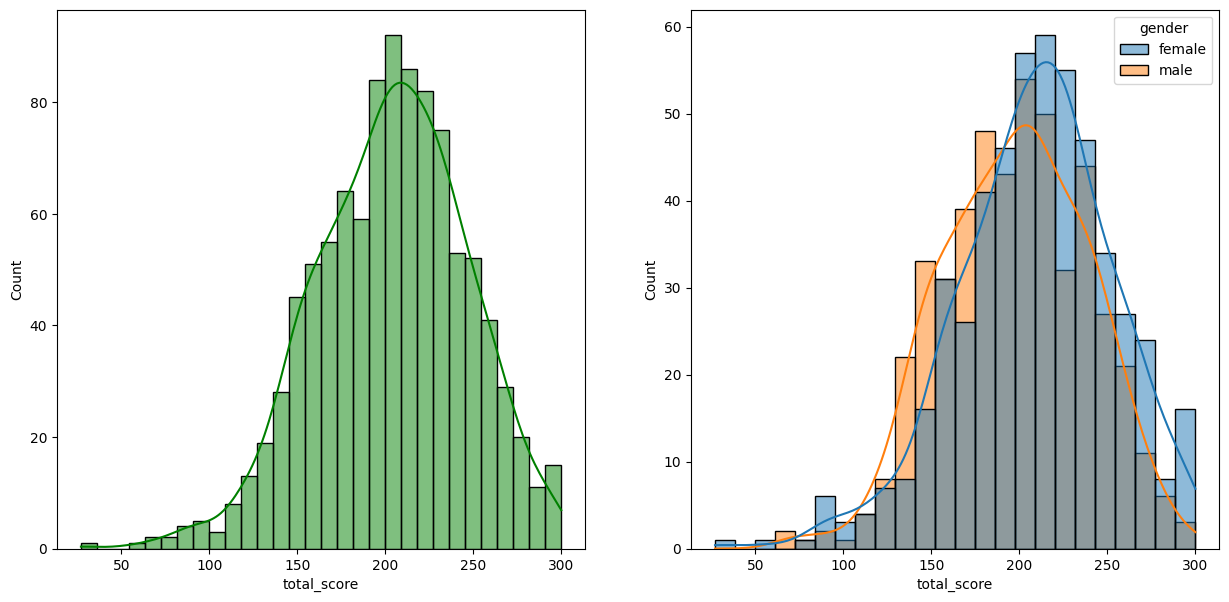

In [20]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="total_score",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="total_score",kde=True,hue="gender")
plt.show()

## female students tend to perform well in exams

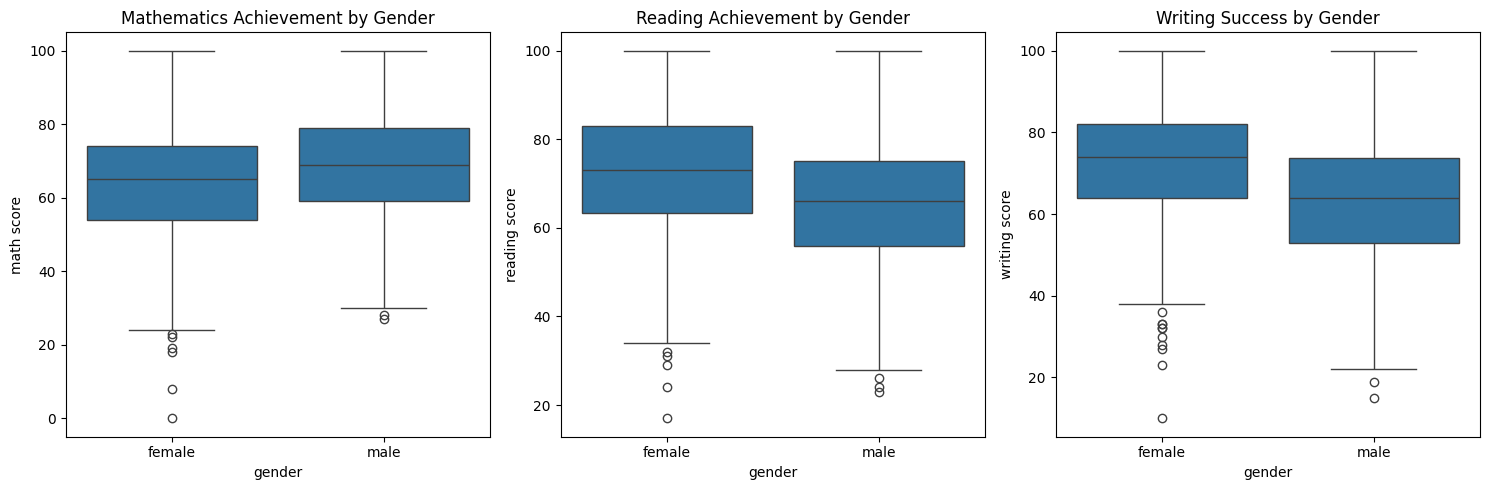

In [27]:
plt.figure(figsize=(15, 5))

# Matematics score
plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Mathematics Achievement by Gender')

# reading score
plt.subplot(1, 3, 2)
sns.boxplot(x='gender', y='reading score', data=df)
plt.title('Reading Achievement by Gender')

# writing score
plt.subplot(1, 3, 3)
sns.boxplot(x='gender', y='writing score', data=df)
plt.title('Writing Success by Gender')

plt.tight_layout()
plt.show()


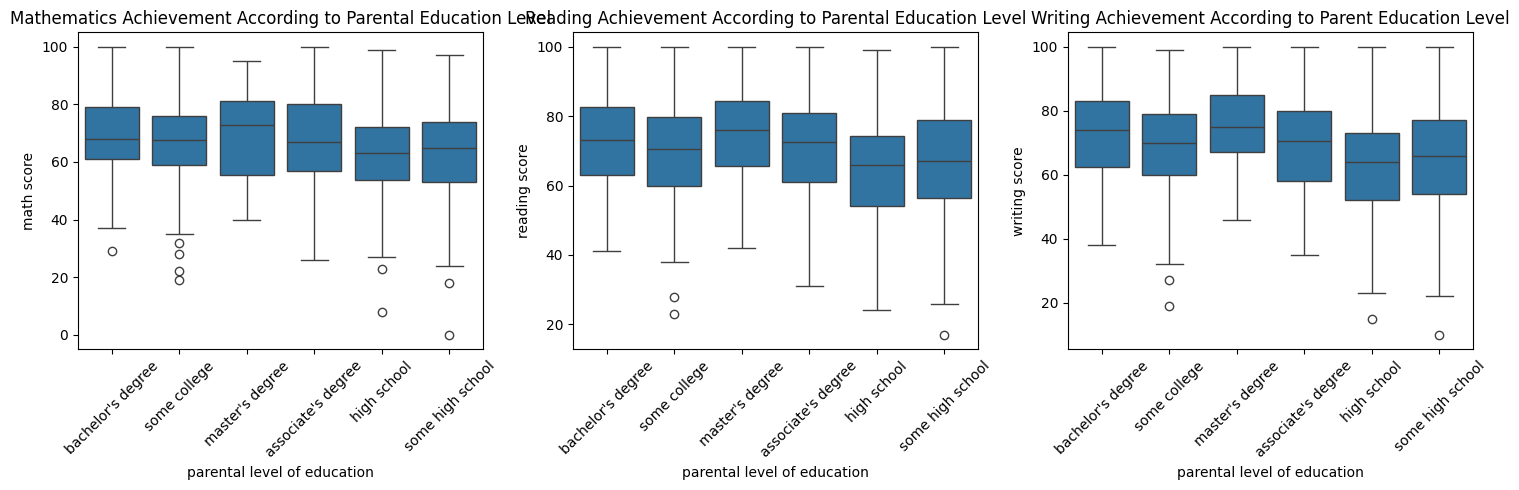

In [28]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.title('Mathematics Achievement According to Parental Education Level')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='parental level of education', y='reading score', data=df)
plt.title('Reading Achievement According to Parental Education Level')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='parental level of education', y='writing score', data=df)
plt.title('Writing Achievement According to Parent Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

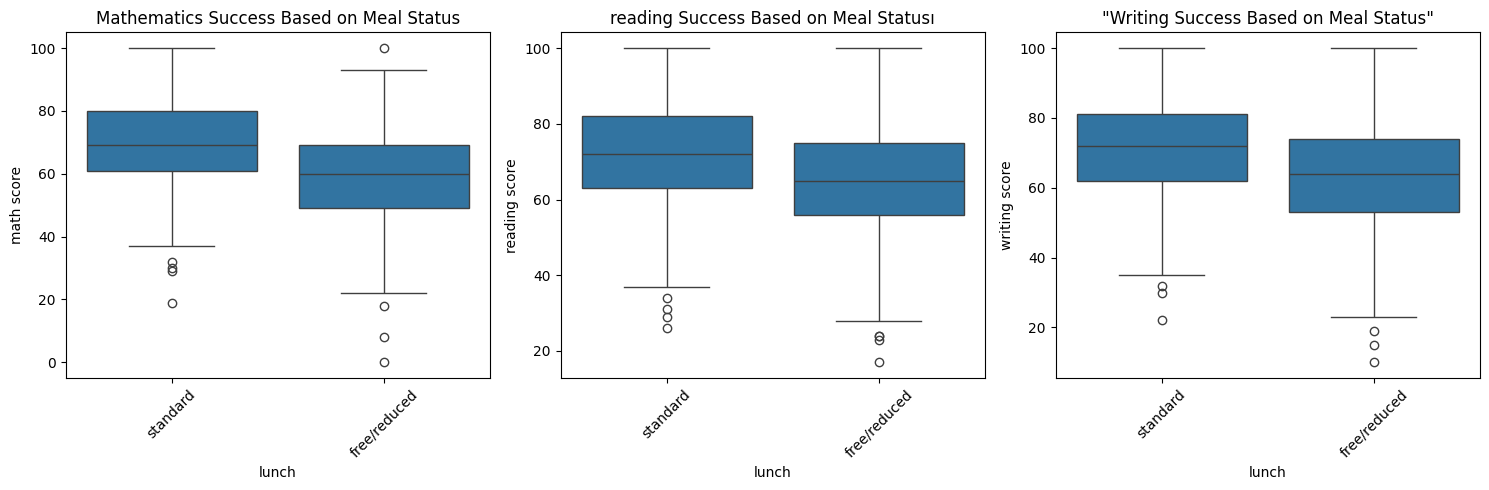

In [29]:
plt.figure(figsize=(15, 5))

# Matematik Puanı
plt.subplot(1, 3, 1)
sns.boxplot(x='lunch', y='math score', data=df)
plt.title('Mathematics Success Based on Meal Status')
plt.xticks(rotation=45)

# Okuma Puanı
plt.subplot(1, 3, 2)
sns.boxplot(x='lunch', y='reading score', data=df)
plt.title('reading Success Based on Meal Statusı')
plt.xticks(rotation=45)

# Yazma Puanı
plt.subplot(1, 3, 3)
sns.boxplot(x='lunch', y='writing score', data=df)
plt.title('"Writing Success Based on Meal Status"')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

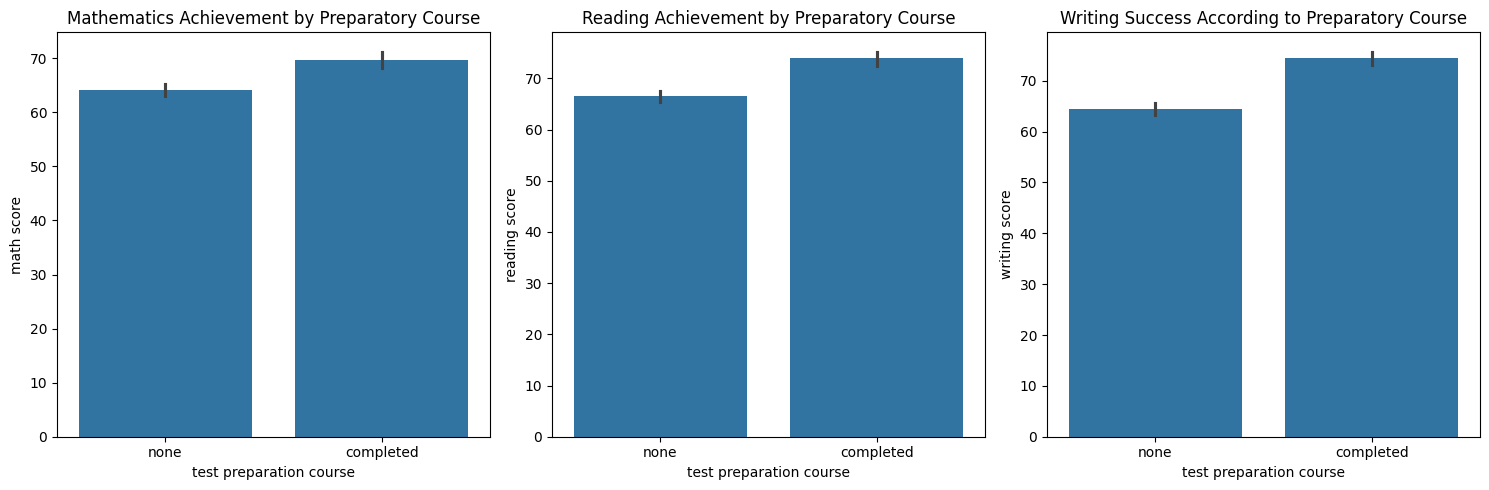

In [30]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course', y='math score', data=df)
plt.title('Mathematics Achievement by Preparatory Course')


plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course', y='reading score', data=df)
plt.title('Reading Achievement by Preparatory Course')


plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course', y='writing score', data=df)
plt.title('Writing Success According to Preparatory Course')

plt.tight_layout()
plt.show()

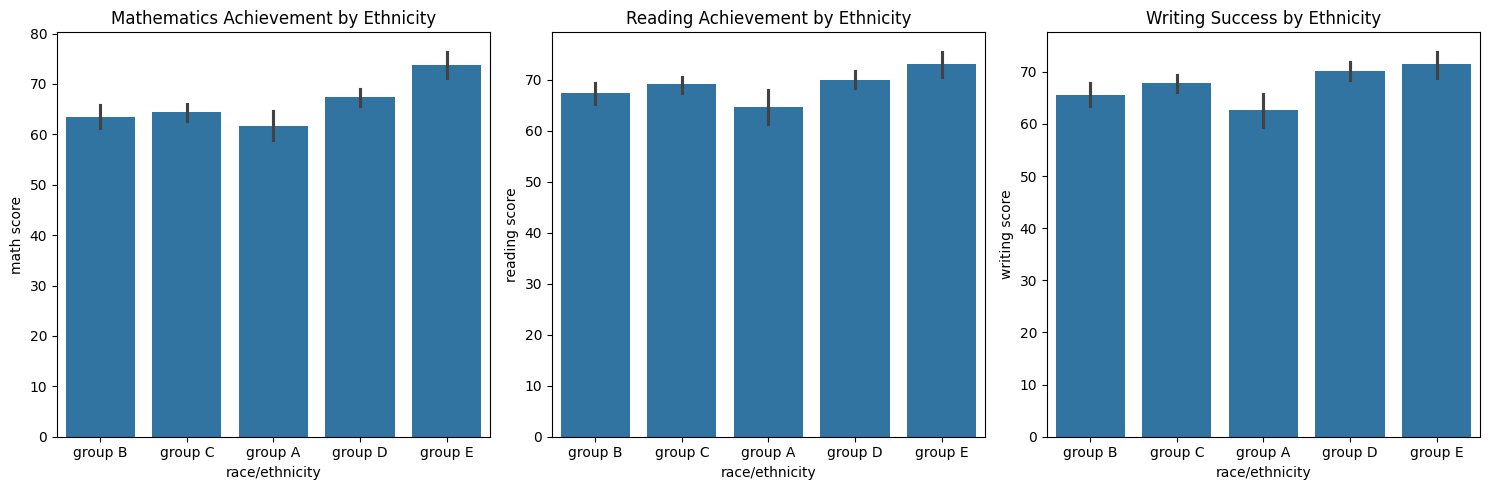

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='race/ethnicity', y='math score', data=df)
plt.title('Mathematics Achievement by Ethnicity')

plt.subplot(1, 3, 2)
sns.barplot(x='race/ethnicity', y='reading score', data=df)
plt.title('Reading Achievement by Ethnicity')

plt.subplot(1, 3, 3)
sns.barplot(x='race/ethnicity', y='writing score', data=df)
plt.title('Writing Success by Ethnicity')

plt.tight_layout()
plt.show()

Mathematics (First Plot):

The Y-axis represents the average math score for each group in race/ethnicity.
Reading (Second Plot):

The Y-axis represents the average reading score for each group in race/ethnicity.
Writing (Third Plot):

The Y-axis represents the average writing score for each group in race/ethnicity.

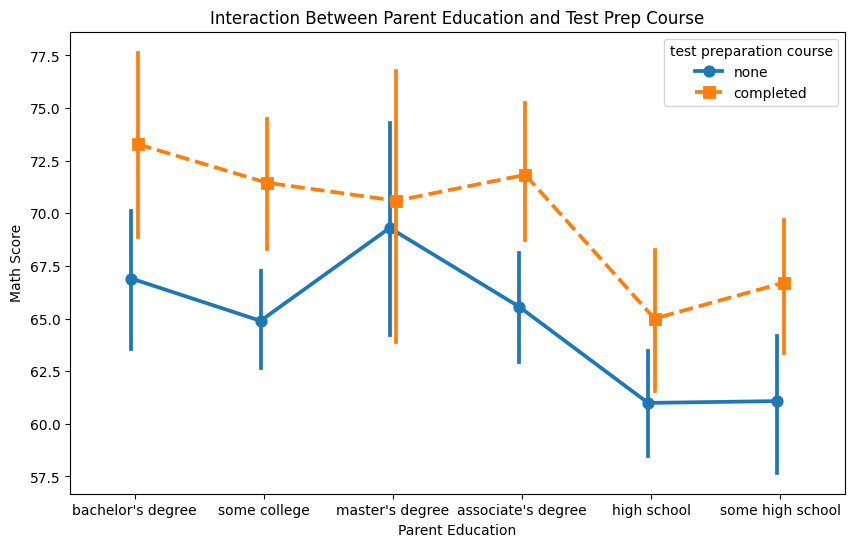

In [32]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='parental level of education', y='math score', hue='test preparation course', data=df, 
              dodge=True, markers=["o", "s"], linestyles=["-", "--"])
plt.title('Interaction Between Parent Education and Test Prep Course')
plt.xlabel('Parent Education')
plt.ylabel('Math Score')
plt.show()